# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA This is a .csv file  



In [ ]:
import pandas as pd
from datetime import datetime
url="https://drive.google.com/uc?id=1QSNJ3B1ku8kjXsA_tCBh4fbpDK7wVLAA"
quality_data_2020=pd.read_csv(url,skiprows =1)
print(quality_data_2020.info())

def clean_df(df):
  df['Date']= pd.to_datetime(df['Date'])
  df['Weekdays']=df['Date'].dt.weekday
  df.drop(df.loc[df["Nitrogen dioxide"]=="nodata"].index, inplace=True)
  df["Nitrogen dioxide"] = pd.to_numeric(df["Nitrogen dioxide"], errors='coerce') 
  df.sort_values("Nitrogen dioxide")  
  df.rename(columns={"Nitrogen dioxide": "NO2 Level (V ug/m2)"}, inplace = True)  
  del df["Status"]
  return df

df_quality_20_new=clean_df(quality_data_2020)
# Show the type of the columns 
print(df_quality_20_new.dtypes)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB
None
Date                   datetime64[ns]
Time                           object
NO2 Level (V ug/m2)           float64
Weekdays                        int64
dtype: object


### Expand the dataset and show summary statistics for larger dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name. 

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

Weekdays
0    14.303682
1    15.297219
2    16.355849
3    14.871229
4    14.893637
5    13.851765
6    11.661928
Name: NO2 Level (V ug/m2), dtype: float64


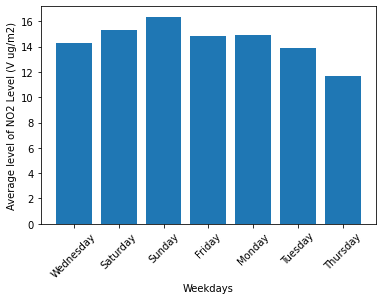

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# This function concatenates two datasets
def concat_df(df1,df2):
  frames = [df1,df2] 
  df3=pd.concat(frames)
  return df3

#This function groups the dataframe by weekdays
def groupby_df(df,column):
  df_grouped_by=df.groupby(column)
  return df_grouped_by

#This function returns the name of the weekday
def get_weekdays(df):
  weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
  return weekDays[df['Weekdays']]

#Read and clean the second dataset
url2="https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ"
quality_data_2021=pd.read_csv(url2,skiprows =1)
df_quality_21_new=clean_df(quality_data_2021)
df_quality_20_21=concat_df(df_quality_20_new,df_quality_21_new)

# get names of weekdays for display
df_quality_20_21["weekday_names"] = df_quality_20_21.apply(get_weekdays, axis=1)
weekday_labels = df_quality_20_21["weekday_names"].unique()

# get average level for each day (NO2 only)
Nit_level=groupby_df(df_quality_20_21,"Weekdays").mean()["NO2 Level (V ug/m2)"]
print(Nit_level)
#This function create a bar chart of the Nitrogen levels in the air
def create_Nitrogen_level_bar_chart():
  plt.xlabel('Weekdays')
  plt.ylabel('Average level of NO2 Level (V ug/m2)')
  plt.bar(weekday_labels, Nit_level)
  plt.xticks(rotation=45)
  plt.show()

create_Nitrogen_level_bar_chart()